In [145]:
import sys
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

sys.path.append(os.path.abspath(os.path.join("..", "src")))

df = pd.read_csv('../Data/Processed/hotel_clean.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   required_car_parking_space            29999 non-null  int64  
 5   lead_time                             29999 non-null  int64  
 6   arrival_year                          29999 non-null  int64  
 7   arrival_month                         29999 non-null  int64  
 8   arrival_date                          29999 non-null  int64  
 9   repeated_guest                        29999 non-null  int64  
 10  no_of_previous_cancellations          29999 non-null  int64  
 11  no_of_previous_

In [146]:
df.info()
from sklearn.model_selection import train_test_split

# critères de base
x = df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space',
        'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
        'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 1',
        'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
        'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
        'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
        'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation', 'market_segment_type_Complementary',
        'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']]

top_features = ['lead_time', 'no_of_special_requests', 'avg_price_per_room',
                'required_car_parking_space', 'type_of_meal_plan_Meal Plan 1',
                'market_segment_type_Online', 'no_of_week_nights', 'no_of_weekend_nights']
x = df[top_features]
# Critère à prédire
y = df['booking_status_Not_Canceled']
print(x)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   required_car_parking_space            29999 non-null  int64  
 5   lead_time                             29999 non-null  int64  
 6   arrival_year                          29999 non-null  int64  
 7   arrival_month                         29999 non-null  int64  
 8   arrival_date                          29999 non-null  int64  
 9   repeated_guest                        29999 non-null  int64  
 10  no_of_previous_cancellations          29999 non-null  int64  
 11  no_of_previous_

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [148]:
# model = DecisionTreeClassifier(max_depth=10)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Meilleurs paramètres :", grid_search.best_params_)

# Meilleur score obtenu
print("Meilleure accuracy moyenne :", grid_search.best_score_)

# Modèle optimisé
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 54 candidates, totalling 270 fits


KeyboardInterrupt: 

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Définir la grille d'hyperparamètres à explorer
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Création du modèle de base
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV : 20 combinaisons aléatoires testées ici
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,               # Nombre de combinaisons aléatoires à tester
    cv=5,                    # Validation croisée à 5 folds
    scoring='accuracy',     # Métrique de scoring
    verbose=2,
    random_state=42,
    n_jobs=-1                # Utilise tous les cœurs disponibles
)

# Entraînement sur le jeu d'entraînement
random_search.fit(x_train, y_train)

# Meilleurs paramètres trouvés
print("Meilleurs hyperparamètres :", random_search.best_params_)

# Meilleur score moyen obtenu
print("Meilleure accuracy moyenne :", random_search.best_score_)

# Évaluer le modèle optimisé sur les données de test
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

# Afficher les métriques
print("\nRapport de classification :\n", classification_report(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Meilleurs hyperparamètres : {'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': None}
Meilleure accuracy moyenne : 0.8822867177189693

Rapport de classification :
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      2017
           1       0.89      0.94      0.91      3983

    accuracy                           0.88      6000
   macro avg       0.88      0.85      0.86      6000
weighted avg       0.88      0.88      0.88      6000

Matrice de confusion :
 [[1537  480]
 [ 235 3748]]


In [141]:
model.fit(x_train, y_train)

InvalidParameterError: The 'max_depth' parameter of RandomForestClassifier must be an int in the range [1, inf) or None. Got [10, 15, None] instead.

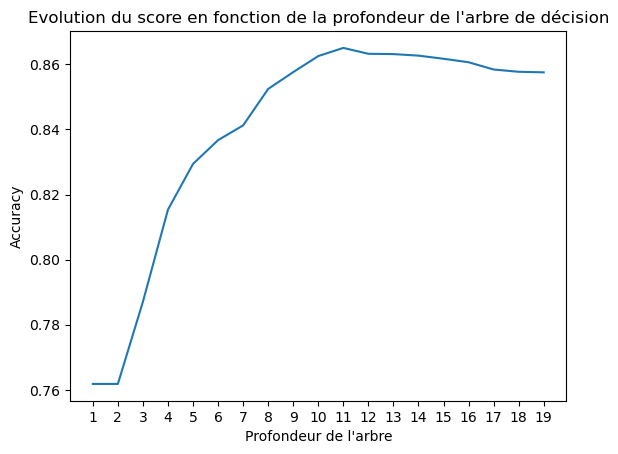

Score maximum pour une profondeur de 11


In [144]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
scores = []
for i in range(1, 20):
    model = DecisionTreeClassifier(max_depth=i)
    score_val = np.mean(cross_val_score(model, x, y, cv=5))
    scores.append(score_val)

plt.plot(range(1, 20), scores)
plt.xticks(range(1, 20))
plt.xlabel('Profondeur de l\'arbre')
plt.ylabel('Accuracy')
plt.title('Evolution du score en fonction de la profondeur de l\'arbre de décision')
plt.show()

prof_max = np.argmax(scores) + 1
print("Score maximum pour une profondeur de", prof_max) # 11

In [118]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 6. Affichage graphique de l'arbre pour débugger avec plot_tree
# plt.figure(figsize=(20, 10))
#plot_tree(model, filled=True, feature_names=x.columns, class_names=['Va annuler', 'Va venir'])
# plt.show()

In [119]:
import numpy as np
from sklearn.model_selection import cross_val_score
print("Accuracy sur les données de test : ", np.round(model.score(x_test, y_test),2)) # Accuracy sur les données de test :  0.84
print("Score moyen par validation croisée : ", np.round(np.mean(cross_val_score(model,x, y, cv=5)), 2)) # Score moyen par validation croisée : 0.85

Accuracy sur les données de test :  0.87
Score moyen par validation croisée :  0.87


In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
# y_pred = model.predict(x_test)
y_probs = model.predict_proba(x_test)[:, 1]
y_pred_thresh = (y_probs >= 0.6).astype(int)

print("Précision : ", np.round(precision_score(y_test, y_pred, average='binary', pos_label=1),2)) # Précision :  0.89
print("Rappel : ", np.round(recall_score(y_test, y_pred, average='binary', pos_label=1),2)) # Rappel :  0.88

Précision :  0.87
Rappel :  0.94


In [130]:
print("Erreur quadratique moyenne : ", mean_squared_error(y_test, y_pred)) # 0.15716666666666668

Erreur quadratique moyenne :  0.134


In [131]:

test_accuracy = accuracy_score(y_test, y_pred) # 0.8428
print(f"Accuracy sur les données de test : {test_accuracy:.4f}")

Accuracy sur les données de test : 0.8660


In [132]:
from graph_utils import display_predict_diff_errors

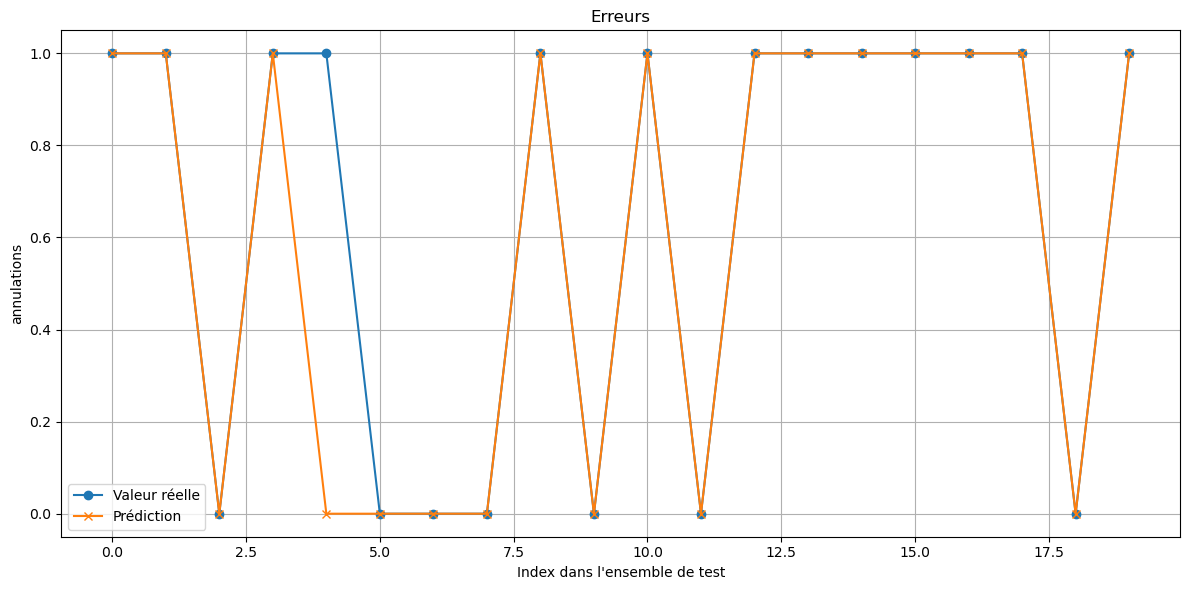

In [133]:
display_predict_diff_errors(y_test, y_pred)

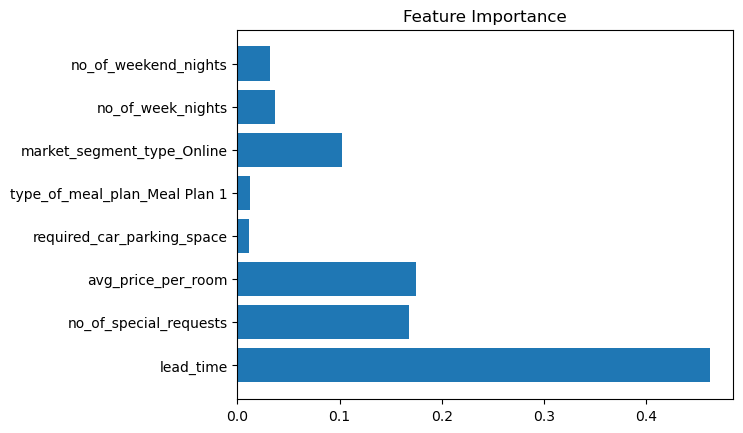

In [134]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = x_train.columns
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()

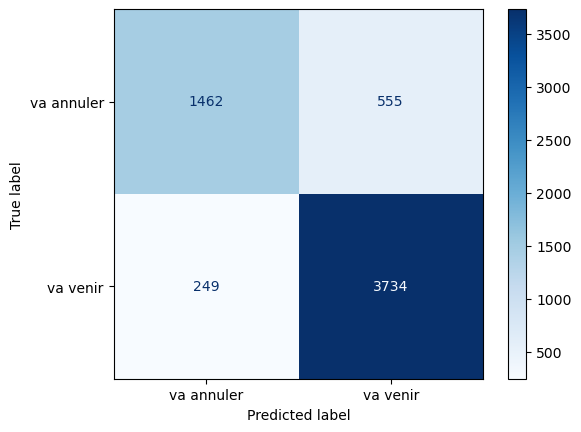

In [135]:
from sklearn.metrics import confusion_matrix



# Affichage plus visuel
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, cmap=plt.cm.Blues, display_labels=['va annuler', 'va venir'])
plt.show()

In [136]:
confusion_matrix(y_test, y_pred)

array([[1462,  555],
       [ 249, 3734]], dtype=int64)